<div style="width: 95%; background-color: #fff87e; color: #0B638B; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

<h1>French Bakery Data Analysis</h1>

For business inquiries or collaboration requests, you can reach me at <span style="font-weight: bold; color: #fff87e;">peige77@gmail.com</span>

The data set begins used represents daily sales at a French bakery, data can be viewed at <a href="https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales" style="color: #0B638B; font-weight: bold;">Kaggle.com.</a>

**Tools & Software utilized:**

- Python with JupyterLab (data cleaning, transformation, manipulation & visualization)
- Excel (data visualization and dashboard creation)
- Tableau (data visualization and dashboard)

**Project structure:**
- Project Objectives & Goals
- Data Loading and Preprocessing
- Exploratory Data Analysis
- Data Visualization 
  - Jupyter Visualizations
  - Excel Dashboard
  - Tableau Dashboard
- Conclusions

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

## Project Objectives & Goals:
- Identify the highest-grossing months of the year.
- Determine the top 10 best-selling items on the menu.
- Determine year-over-year revenue growth.
- Project total yearly revenue for 2022.
- Project yearly revenue for 2023.

<head>
  <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Montserrat">
</head>
<div style="font-family: 'Montserrat', sans-serif; font-size: 18px; width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border-radius: 10px; font-weight: bold; text-align: center;">
<h4>Data Loading and Processing</h4>
</div>

In [2464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2465]:
df = pd.read_csv(r'C:\Users\PM\Desktop\Data Analytics Projects\Bakery Sales\Bakery_Sales.csv')

<head>
  <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Montserrat">
</head>
<div style="font-family: 'Montserrat', sans-serif; font-size: 18px; width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border-radius: 10px; font-weight: bold; text-align: center;">
<h4>Exploratory Data Analysis</h4>
</div>

In [2466]:
df.head(3)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"


In [2467]:
df.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


In [2468]:
df.shape

(234005, 7)

In [2469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [2470]:
df.isnull().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

In [2471]:
df.isna().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

<head>
  <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Montserrat">
</head>
<div style="font-family: 'Montserrat', sans-serif; font-size: 18px; width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border-radius: 10px; font-weight: bold; text-align: center;">
  Data Structuring
</div>

In [2472]:
# Creating a 'month' column and 'year' column based on the existing 'date' column

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head(3)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,year,month
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",2021,1
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",2021,1
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",2021,1


In [2473]:
# Renaming columns for consistency and simplicity
df = df.rename(columns={'article': 'items'})
df = df.rename(columns={'unit_price': 'price'})
df = df.rename(columns={'Quantity': 'quantity'})

In [2474]:
df.head(3)

,Unnamed: 0,date,time,ticket_number,items,quantity,price,year,month
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",2021,1
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",2021,1
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",2021,1


In [2475]:
# determining the data types of each of our columns for future calculations and conversions
df.dtypes

Unnamed: 0                int64
date             datetime64[ns]
time                     object
ticket_number           float64
items                    object
quantity                float64
price                    object
year                      int32
month                     int32
dtype: object

In [2476]:
# Replacing the ',' in the price column with a '.' and turning categories into floats
df['price'] = df['price'].astype(str).str.replace(',','.')
df['price'] = df['price'].str.replace('€','')

df['price'] = df['price'].astype(float)
df['quantity'] = df['quantity'].astype(float)

df.dtypes

Unnamed: 0                int64
date             datetime64[ns]
time                     object
ticket_number           float64
items                    object
quantity                float64
price                   float64
year                      int32
month                     int32
dtype: object

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Jan 2021</code> and determining the revenue per item and total revenue for the month.

In [2477]:
# Convert the 'date' column to a datetime format 
df['date'] = pd.to_datetime(df['date'])

# Create a new DataFrame that filters data for January 2021
jan2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 1)]

In [2478]:
# Determining the total number of items sold in Jan 2021
jan2021['quantity'].sum()

9476.0

In [2479]:
# Grouping 'item' column and aggrigating the 'quantity' & 'price' column
jan2021 = jan2021.groupby('items').agg({'quantity': 'sum', 'price': 'sum', 'price': 'first'}).reset_index(False)

total_quantity_jan2021 = jan2021['quantity'].sum()

print("Total Quantity:", total_quantity_jan2021)
jan2021.head(1)

Total Quantity: 9476.0


,items,quantity,price
0,BAGUETTE,741.0,0.9


In [2480]:
# Creating a new column 'item_rev' for the total revenue per item in Jan 2021
jan2021['item_rev_jan2021']= jan2021['quantity'] * jan2021['price']
jan2021.head(1)

,items,quantity,price,item_rev_jan2021
0,BAGUETTE,741.0,0.9,666.9


In [2481]:
# Determining the total revenue for the Jan 2021
total_rev_jan2021 = jan2021['item_rev_jan2021'].sum().round()
print(f'The total revenue for Jan 2021: €{total_rev_jan2021}')

The total revenue for Jan 2021: €14798.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Feb 2021</code> and determining the revenue per item and total revenue for the month.

In [2482]:
feb2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 2)]

In [2483]:
feb2021['quantity'].sum()

11834.0

In [2484]:
feb2021 = feb2021.groupby('items').agg({'quantity': 'sum', 'price' : 'sum', 'price' :'first'}).reset_index(False)

total_quantity_feb2021 = feb2021['quantity'].sum()

print(f'Total quantity of orders in Feb 2021: {total_quantity_feb2021}')

feb2021.head(1)

Total quantity of orders in Feb 2021: 11834.0


,items,quantity,price
0,BAGUETTE,774.0,0.9


In [2485]:
feb2021['item_rev_feb2021']= feb2021['quantity'] * feb2021['price']
feb2021.head(1)

,items,quantity,price,item_rev_feb2021
0,BAGUETTE,774.0,0.9,696.6


In [2486]:
total_rev_feb2021 = feb2021['item_rev_feb2021'].sum().round()
print(f'The total revenue for Feb 2021: €{total_rev_feb2021}')

The total revenue for Feb 2021: €17116.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Mar 2021</code> and determining the revenue per item and total revenue for the month.

In [2487]:
mar2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 3)]
mar2021['quantity'].sum()

13794.0

In [2488]:
mar2021.head()

,Unnamed: 0,date,time,ticket_number,items,quantity,price,year,month
14379,31521,2021-03-01,08:33,158607.0,TRADITIONAL BAGUETTE,1.0,1.2,2021,3
14380,31524,2021-03-01,08:34,158608.0,CROISSANT,2.0,1.1,2021,3
14381,31527,2021-03-01,08:40,158609.0,TRADITIONAL BAGUETTE,1.0,1.2,2021,3
14382,31530,2021-03-01,08:45,158610.0,TRADITIONAL BAGUETTE,1.0,1.2,2021,3
14383,31533,2021-03-01,08:47,158611.0,TRADITIONAL BAGUETTE,2.0,1.2,2021,3


In [2489]:
mar2021 = mar2021.groupby('items').agg({'quantity': 'sum', 'price': 'sum', 'price': 'first'}).reset_index(False)

total_quantity_mar2021 = mar2021['quantity'].sum()

print(f'Total quantity of orders in Mar 2021: {total_quantity_mar2021}')

mar2021.head(1)

Total quantity of orders in Mar 2021: 13794.0


,items,quantity,price
0,.,3.0,0.0


In [2490]:
mar2021['item_rev_mar2021'] = mar2021['quantity'] * mar2021['price']
mar2021.head(1)

,items,quantity,price,item_rev_mar2021
0,.,3.0,0.0,0.0


In [2491]:
total_rev_mar2021 = mar2021['item_rev_mar2021'].sum().round()
print(f'The total revenue for Mar 2021: €{total_rev_mar2021}')

The total revenue for Mar 2021: €20093.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Apr 2021</code> and determining the revenue per item and total revenue for the month.

In [2492]:
apr2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 4)]
apr2021['quantity'].sum()

16554.0

In [2493]:
apr2021 = apr2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Apr 2021:', apr2021['quantity'].sum())
apr2021.head(1)

Total quantity of orders in Apr 2021: 16554.0


,items,quantity,price
0,.,2.0,0.0


In [2494]:
apr2021['item_rev_apr2021'] = apr2021['quantity'] * apr2021['price']
apr2021.head(1)

,items,quantity,price,item_rev_apr2021
0,.,2.0,0.0,0.0


In [2495]:
total_rev_apr2021 = apr2021['item_rev_apr2021'].sum().round()
print(f'The total revenue for Apr 2021: €{total_rev_apr2021}')

The total revenue for Apr 2021: €24365.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>May 2021</code> and determining the revenue per item and total revenue for the month.

In [2496]:
may2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 5)]
may2021['quantity'].sum()

19469.0

In [2497]:
may2021 = may2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in May 2021: ', may2021['quantity'].sum())
may2021.head(1)

Total quantity of orders in May 2021:  19469.0


,items,quantity,price
0,BAGUETTE,1120.0,0.9


In [2498]:
may2021['item_rev_may2021'] = may2021['quantity'] * may2021['price']

may2021.head(1)

,items,quantity,price,item_rev_may2021
0,BAGUETTE,1120.0,0.9,1008.0


In [2499]:
total_rev_may2021 = may2021['item_rev_may2021'].sum().round()
print(f'The total revenue for May 2021: €{total_rev_may2021}')

The total revenue for May 2021: €29273.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Jun 2021</code> and determining the revenue per item and total revenue for the month.

In [2500]:
jun2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 6)]
jun2021['quantity'].sum()

16369.0

In [2501]:
jun2021 = jun2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Jun 2021: ' , jun2021['quantity'].sum())
jun2021.head(1)

Total quantity of orders in Jun 2021:  16369.0


,items,quantity,price
0,BAGUETTE,1036.0,0.9


In [2502]:
jun2021['item_rev_jun2021'] = jun2021['quantity'] * jun2021['price']
jun2021.head(1)

,items,quantity,price,item_rev_jun2021
0,BAGUETTE,1036.0,0.9,932.4


In [2503]:
total_rev_jun2021 = jun2021['item_rev_jun2021'].sum().round()
print(f'The total revenue for Jun 2021: €{total_rev_jun2021}')

The total revenue for Jun 2021: €24780.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Jul 2021</code> and determining the revenue per item and total revenue for the month.

In [2504]:
jul2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 7)]
jul2021['quantity'].sum()

28337.0

In [2505]:
jul2021 = jul2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Jul 2021:' , jul2021['quantity'].sum())
jul2021.head(1)

Total quantity of orders in Jul 2021: 28337.0


,items,quantity,price
0,.,2.0,0.0


In [2506]:
jul2021['item_rev_jul2021'] = jul2021['quantity']  * jul2021['price']

total_rev_jul2021 = jul2021['item_rev_jul2021'].sum().round()
print(f'The total revenue for Jul 2021: €{total_rev_jul2021}')

The total revenue for Jul 2021: €41470.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Aug 2021</code> and determining the revenue per item and total revenue for the month.

In [2507]:
aug2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 8)]
aug2021['quantity'].sum()

33328.0

In [2508]:
aug2021 = aug2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Aug 2021:' , aug2021['quantity'].sum())
aug2021.head(1)

Total quantity of orders in Aug 2021: 33328.0


,items,quantity,price
0,BAGUETTE,1966.0,0.9


In [2509]:
aug2021['item_rev_aug2021'] = aug2021['quantity']  * aug2021['price']

total_rev_aug2021 = aug2021['item_rev_aug2021'].sum().round()
print(f'The total revenue for Aug 2021: €{total_rev_aug2021}')

The total revenue for Aug 2021: €48499.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Sep 2021</code> and determining the revenue per item and total revenue for the month.

In [2510]:
sep2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 9)]
sep2021['quantity'].sum()

15276.0

In [2511]:
sep2021 = sep2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Sep 2021:' , sep2021['quantity'].sum())
aug2021.head(1)

Total quantity of orders in Sep 2021: 15276.0


,items,quantity,price,item_rev_aug2021
0,BAGUETTE,1966.0,0.9,1769.4


In [2512]:
sep2021['item_rev_sep2021'] = sep2021['quantity']  * sep2021['price']

total_rev_sep2021 = sep2021['item_rev_sep2021'].sum().round()
print(f'The total revenue for Sep 2021: €{total_rev_sep2021}')

The total revenue for Sep 2021: €22551.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Oct 2021</code> and determining the revenue per item and total revenue for the month.

In [2513]:
oct2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 10)]
oct2021['quantity'].sum()

14971.0

In [2514]:
oct2021 = oct2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Oct 2021:' , oct2021['quantity'].sum())
oct2021.head(1)

Total quantity of orders in Oct 2021: 14971.0


,items,quantity,price
0,BAGUETTE,983.0,0.9


In [2515]:
oct2021['item_rev_oct2021'] = oct2021['quantity']  * oct2021['price']

total_rev_oct2021 = oct2021['item_rev_oct2021'].sum().round()
print(f'The total revenue for Oct 2021: €{total_rev_oct2021}')

The total revenue for Oct 2021: €23651.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Nov 2021</code> and determining the revenue per item and total revenue for the month.

In [2516]:
nov2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 11)]
nov2021['quantity'].sum()

11773.0

In [2517]:
nov2021 = nov2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Nov 2021:' , nov2021['quantity'].sum())
nov2021.head(1)

Total quantity of orders in Nov 2021: 11773.0


,items,quantity,price
0,ARTICLE 295,1.0,0.0


In [2518]:
nov2021['item_rev_sep2021'] = nov2021['quantity']  * nov2021['price']

total_rev_nov2021 = nov2021['item_rev_sep2021'].sum().round()
print(f'The total revenue for Nov 2021: €{total_rev_nov2021}')

The total revenue for Nov 2021: €17984.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Dec 2021</code> and determining the revenue per item and total revenue for the month.

In [2519]:
dec2021 = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 12)]
dec2021['quantity'].sum()

12138.0

In [2520]:
dec2021 = dec2021.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Dec 2021:' , dec2021['quantity'].sum())
dec2021.head(1)

Total quantity of orders in Dec 2021: 12138.0


,items,quantity,price
0,BAGUETTE,755.0,0.9


In [2521]:
dec2021['item_rev_dec2021'] = dec2021['quantity']  * dec2021['price']

total_rev_dec2021 = dec2021['item_rev_dec2021'].sum().round()
print(f'The total revenue for Dec 2021: €{total_rev_dec2021}')

The total revenue for Dec 2021: €18861.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Jan 2022</code> and determining the revenue per item and total revenue for the month.

In [2522]:
jan2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 1)]
jan2022['quantity'].sum()

8952.0

In [2523]:
jan2022 = jan2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Jan 2022:' , jan2022 ['quantity'].sum())
jan2022 .head(1)

Total quantity of orders in Jan 2022: 8952.0


,items,quantity,price
0,BAGUETTE,617.0,0.9


In [2524]:
jan2022['item_rev_jan2022'] = jan2022['quantity'] * jan2022['price']
jan2022.head(1)

,items,quantity,price,item_rev_jan2022
0,BAGUETTE,617.0,0.9,555.3


In [2525]:
jan2022['item_rev_jan2022'] = jan2022['quantity']  * jan2022['price']

total_rev_jan2022 = jan2022['item_rev_jan2022'].sum().round()
print(f'The total revenue for Jan 2022: €{total_rev_jan2022}')

The total revenue for Jan 2022: €16898.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Feb 2022</code> and determining the revenue per item and total revenue for the month.

In [2526]:
feb2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 2)]
feb2022['quantity'].sum()

11531.0

In [2527]:
feb2022 = feb2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Feb 2022:' , feb2022['quantity'].sum())
feb2022 .head(1)

Total quantity of orders in Feb 2022: 11531.0


,items,quantity,price
0,BAGUETTE,782.0,0.9


In [2528]:
feb2022['item_rev_feb2022'] = feb2022['quantity'] * feb2022['price']
feb2022.head(1)

,items,quantity,price,item_rev_feb2022
0,BAGUETTE,782.0,0.9,703.8


In [2529]:
feb2022['item_rev_feb2022'] = feb2022['quantity']  * feb2022['price']

total_rev_feb2022 = feb2022['item_rev_feb2022'].sum().round()
print(f'The total revenue for Feb 2022: €{total_rev_feb2022}')

The total revenue for Feb 2022: €16702.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Mar 2022</code> and determining the revenue per item and total revenue for the month.

In [2530]:
mar2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 3)]
mar2022['quantity'].sum()

11789.0

In [2531]:
mar2022 = mar2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Mar 2022:' , mar2022 ['quantity'].sum())
mar2022 .head(1)

Total quantity of orders in Mar 2022: 11789.0


,items,quantity,price
0,BAGUETTE,766.0,0.95


In [2532]:
mar2022['item_rev_mar2022'] = mar2022['quantity'] * mar2022['price']
mar2022.head(1)

,items,quantity,price,item_rev_mar2022
0,BAGUETTE,766.0,0.95,727.7


In [2533]:
mar2022['item_rev_mar2022'] = mar2022['quantity']  * mar2022['price']

total_rev_mar2022 = mar2022['item_rev_mar2022'].sum().round()
print(f'The total revenue for Mar 2022: €{total_rev_mar2022}')

The total revenue for Mar 2022: €19313.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Apr 2022</code> and determining the revenue per item and total revenue for the month.

In [2534]:
apr2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 4)]
apr2022['quantity'].sum()

14925.0

In [2535]:
apr2022 = apr2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in apr 2022:' , apr2022 ['quantity'].sum())
apr2022 .head(1)

Total quantity of orders in apr 2022: 14925.0


,items,quantity,price
0,BAGUETTE,934.0,0.95


In [2536]:
apr2022['item_rev_apr2022'] = apr2022['quantity'] * apr2022['price']
apr2022.head(1)

,items,quantity,price,item_rev_apr2022
0,BAGUETTE,934.0,0.95,887.3


In [2537]:
apr2022['item_rev_apr2022'] = apr2022['quantity']  * apr2022['price']

total_rev_apr2022 = apr2022['item_rev_apr2022'].sum().round()
print(f'The total revenue for Apr 2022: €{total_rev_apr2022}')

The total revenue for Apr 2022: €24914.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>May 2022</code> and determining the revenue per item and total revenue for the month.

In [2538]:
may2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 5)]
may2022['quantity'].sum()

17643.0

In [2539]:
may2022 = may2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in May 2022:' , may2022 ['quantity'].sum())
may2022 .head(1)

Total quantity of orders in May 2022: 17643.0


,items,quantity,price
0,BAGUETTE,1059.0,0.95


In [2540]:
may2022['item_rev_may2022'] = may2022['quantity'] * may2022['price']
may2022.head(1)

,items,quantity,price,item_rev_may2022
0,BAGUETTE,1059.0,0.95,1006.05


In [2541]:
may2022['item_rev_may2022'] = may2022['quantity']  * may2022['price']

total_rev_may2022 = may2022['item_rev_may2022'].sum().round()
print(f'The total revenue for May 2022: €{total_rev_may2022}')

The total revenue for May 2022: €28907.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Jun 2022</code> and determining the revenue per item and total revenue for the month.

In [2542]:
jun2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 6)]
jun2022['quantity'].sum()

15659.0

In [2543]:
jun2022 = jun2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Jun 2022:' , jun2022 ['quantity'].sum())
jun2022 .head(1)

Total quantity of orders in Jun 2022: 15659.0


,items,quantity,price
0,BAGUETTE,1039.0,0.95


In [2544]:
jun2022['item_rev_jun2022'] = jun2022['quantity'] * jun2022['price']
jun2022.head(1)

,items,quantity,price,item_rev_jun2022
0,BAGUETTE,1039.0,0.95,987.05


In [2545]:
jun2022['item_rev_jun2022'] = jun2022['quantity']  * jun2022['price']

total_rev_jun2022 = jun2022['item_rev_jun2022'].sum().round()
print(f'The total revenue for Jun 2022: €{total_rev_jun2022}')

The total revenue for Jun 2022: €25482.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Jul 2022</code> and determining the revenue per item and total revenue for the month.

In [2546]:
jul2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 7)]
jul2022['quantity'].sum()

29192.0

In [2547]:
jul2022 = jul2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Jul 2022:' , jul2022 ['quantity'].sum())
jul2022 .head(1)

Total quantity of orders in Jul 2022: 29192.0


,items,quantity,price
0,12 MACARON,14.0,10.0


In [2548]:
jul2022['item_rev_jul2022'] = jul2022['quantity'] *jul2022['price']
jul2022.head(1)

,items,quantity,price,item_rev_jul2022
0,12 MACARON,14.0,10.0,140.0


In [2549]:
jul2022['item_rev_jul2022'] = jul2022['quantity']  * jul2022['price']

total_rev_jul2022 = jul2022['item_rev_jul2022'].sum().round()
print(f'The total revenue for Jul 2022: €{total_rev_jul2022}')

The total revenue for Jul 2022: €46480.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Aug 2022</code> and determining the revenue per item and total revenue for the month.

In [2550]:
aug2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 8)]
aug2022['quantity'].sum()

33545.0

In [2551]:
aug2022 = aug2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Aug 2022:' , aug2022 ['quantity'].sum())
aug2022 .head(1)

Total quantity of orders in Aug 2022: 33545.0


,items,quantity,price
0,12 MACARON,47.0,10.0


In [2552]:
aug2022['item_rev_aug2022'] = aug2022['quantity'] *aug2022['price']
aug2022.head(1)

,items,quantity,price,item_rev_aug2022
0,12 MACARON,47.0,10.0,470.0


In [2553]:
aug2022['item_rev_aug2022'] = aug2022['quantity']  * aug2022['price']

total_rev_aug2022 = aug2022['item_rev_aug2022'].sum().round()
print(f'The total revenue for Aug 2022: €{total_rev_aug2022}')

The total revenue for Aug 2022: €53808.0


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a dataframe for <code>Sep 2022</code> and determining the revenue per item and total revenue for the month.

In [2554]:
sep2022 = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == 9)]
sep2022['quantity'].sum()

13433.0

In [2555]:
sep2022 = sep2022 .groupby('items').agg({'quantity':'sum','price':'sum','price':'first'}).reset_index(False)

print('Total quantity of orders in Sep 2022:' , sep2022 ['quantity'].sum())
sep2022 .head(1)

Total quantity of orders in Sep 2022: 13433.0


,items,quantity,price
0,12 MACARON,9.0,10.0


In [2556]:
sep2022['item_rev_sep2022'] = sep2022['quantity'] *sep2022['price']
sep2022.head(1)

,items,quantity,price,item_rev_sep2022
0,12 MACARON,9.0,10.0,90.0


In [2557]:
sep2022['item_rev_sep2022'] = sep2022['quantity']  * sep2022['price']

total_rev_sep2022 = sep2022['item_rev_sep2022'].sum().round()
print(f'The total revenue for Sep 2022: €{total_rev_sep2022}')

The total revenue for Sep 2022: €21860.0


<head>
  <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Montserrat">
</head>
<div style="font-family: 'Montserrat', sans-serif; font-size: 18px; width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border-radius: 10px; font-weight: bold; text-align: center;">
<h4>Data Visualization</h4>
</div>

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a new list that shows the revenue for each month of 2021.

In [2558]:
rev_by_month={'jan21':total_rev_jan2021, 'feb21':total_rev_feb2021, 'mar21':total_rev_mar2021, 'apr21':total_rev_apr2021,
             'may21':total_rev_may2021, 'jun21':total_rev_jun2021, 'jul21':total_rev_jul2021, 'aug21':total_rev_aug2021,
             'sep21':total_rev_sep2021, 'oct21':total_rev_oct2021, 'nov21':total_rev_nov2021, 'dec21':total_rev_dec2021}

for key, value in rev_by_month.items():
    print(f'{key.title()} revenue: €{value}')

Jan21 revenue: €14798.0
Feb21 revenue: €17116.0
Mar21 revenue: €20093.0
Apr21 revenue: €24365.0
May21 revenue: €29273.0
Jun21 revenue: €24780.0
Jul21 revenue: €41470.0
Aug21 revenue: €48499.0
Sep21 revenue: €22551.0
Oct21 revenue: €23651.0
Nov21 revenue: €17984.0
Dec21 revenue: €18861.0


In [2559]:
rev_by_month_sorted2021 = list(rev_by_month.items())
rev_by_month_sorted2021.sort(key=lambda item: item[1], reverse=True)

for key, value in rev_by_month_sorted2021:
    print(f'{key.title()} revenue: €{value}')

Aug21 revenue: €48499.0
Jul21 revenue: €41470.0
May21 revenue: €29273.0
Jun21 revenue: €24780.0
Apr21 revenue: €24365.0
Oct21 revenue: €23651.0
Sep21 revenue: €22551.0
Mar21 revenue: €20093.0
Dec21 revenue: €18861.0
Nov21 revenue: €17984.0
Feb21 revenue: €17116.0
Jan21 revenue: €14798.0


In [2560]:
total_revenue_2021_first9 = 0

for month in list(rev_by_month)[:9]:
    total_revenue_2021_first9 += rev_by_month[month]

print("Total revenue for the first 9 months of 2021:", total_revenue_2021_first9)

Total revenue for the first 9 months of 2021: 242945.0


In [2561]:
yearly_rev = sum(rev_by_month.values())
print('Revenue for 2021: €',yearly_rev)

Revenue for 2021: € 303441.0


In [2562]:
rev_by_month_sorted2021 = pd.DataFrame(rev_by_month_sorted2021, columns=['month','revenue'])
rev_by_month_sorted2021

,month,revenue
0,aug21,48499.0
1,jul21,41470.0
2,may21,29273.0
3,jun21,24780.0
4,apr21,24365.0
5,oct21,23651.0
6,sep21,22551.0
7,mar21,20093.0
8,dec21,18861.0
9,nov21,17984.0


C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x400 with 0 Axes>

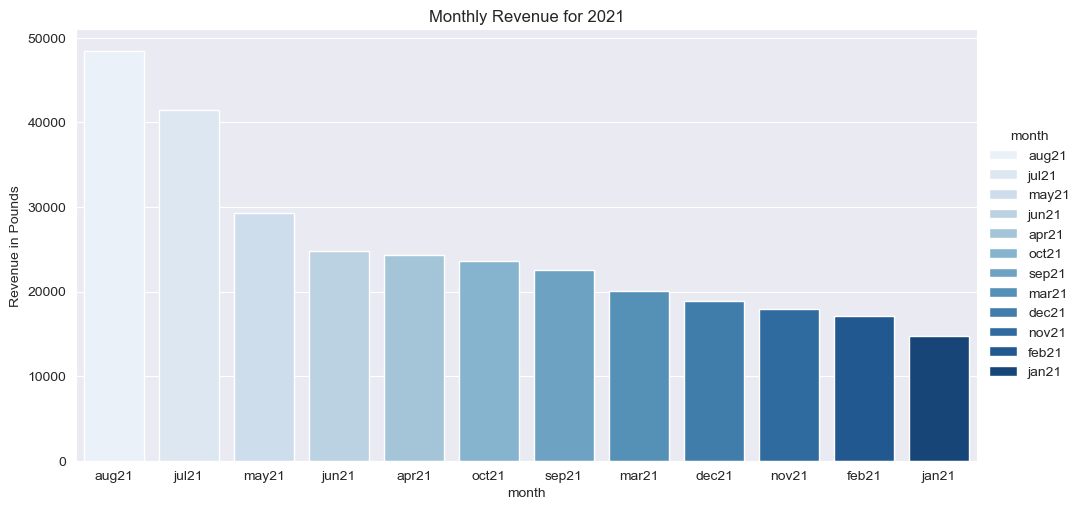

In [2563]:
plt.figure(figsize=(12, 4))
sns.set_style('darkgrid')
sns.catplot(data=rev_by_month_sorted2021, x='month', y='revenue', kind='bar', hue='month', legend=True, aspect=2, palette='Blues')
plt.title('Monthly Revenue for 2021')
plt.ylabel('Revenue in Pounds')
plt.show()

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Creating a new list that shows the revenue for each month of 2022.

In [2564]:
rev_by_month_2022 = {'jan22': total_rev_jan2022, 'feb22': total_rev_feb2022, 'mar22': total_rev_mar2022, 'apr22':total_rev_apr2022,
                     'may22':total_rev_may2022, 'jun22':total_rev_jun2022, 'jul22':total_rev_jul2022, 'aug22':total_rev_aug2022,
                     'sep22':total_rev_sep2022}

for key, value in rev_by_month_2022.items():
    print(f'{key.title()} revenues: €{value}')

Jan22 revenues: €16898.0
Feb22 revenues: €16702.0
Mar22 revenues: €19313.0
Apr22 revenues: €24914.0
May22 revenues: €28907.0
Jun22 revenues: €25482.0
Jul22 revenues: €46480.0
Aug22 revenues: €53808.0
Sep22 revenues: €21860.0


In [2565]:
rev_by_month_sorted2022 = list(rev_by_month_2022.items())
rev_by_month_sorted2022.sort(key=lambda x: x[1], reverse=True)
for key, value in rev_by_month_sorted2022:
    print(f'{key.title()} revenue: €{value}')

Aug22 revenue: €53808.0
Jul22 revenue: €46480.0
May22 revenue: €28907.0
Jun22 revenue: €25482.0
Apr22 revenue: €24914.0
Sep22 revenue: €21860.0
Mar22 revenue: €19313.0
Jan22 revenue: €16898.0
Feb22 revenue: €16702.0


In [2566]:
first_9_months = list(rev_by_month.values())
first_9_months = sum(first_9_months)
print('Revenue for the first 9 months of 2021: €', first_9_months)

Revenue for the first 9 months of 2021: € 303441.0


In [2567]:
rev_by_month_sorted2022 = pd.DataFrame(rev_by_month_sorted2022, columns=['month','revenue'])
rev_by_month_sorted2022

,month,revenue
0,aug22,53808.0
1,jul22,46480.0
2,may22,28907.0
3,jun22,25482.0
4,apr22,24914.0
5,sep22,21860.0
6,mar22,19313.0
7,jan22,16898.0
8,feb22,16702.0


C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x400 with 0 Axes>

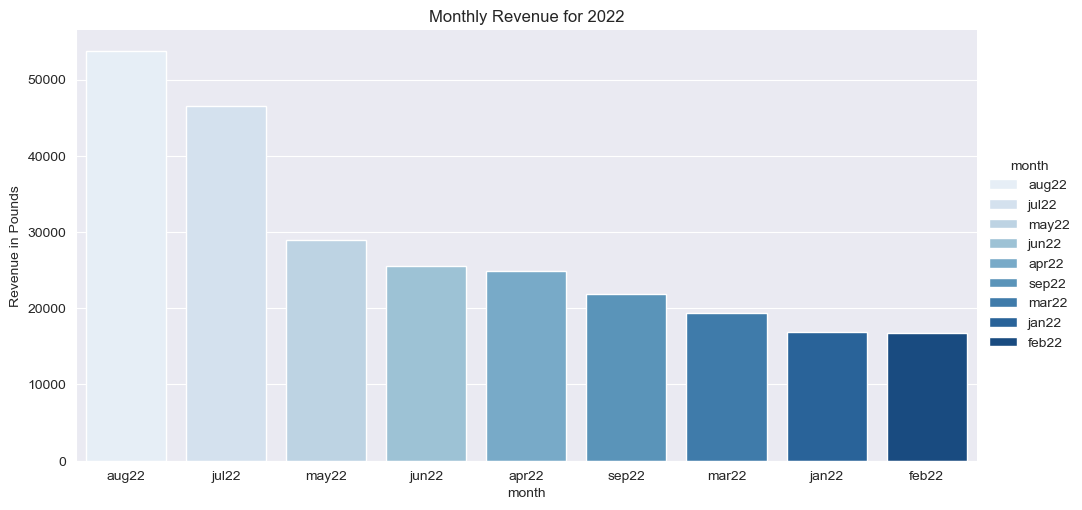

In [2568]:
plt.figure(figsize=(12,4))
sns.catplot(data=rev_by_month_sorted2022, x='month', y='revenue', hue='month', palette='Blues', legend=True, kind='bar', aspect=2)

plt.title('Monthly Revenue for 2022')
plt.ylabel('Revenue in Pounds')
plt.show()

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Merdging our two lists to create a list with total revenue

In [2569]:
merged_rev = {}

for key, value in rev_by_month.items():
    merged_rev[key] = merged_rev.get(key, 0) + value

for key, value in rev_by_month_2022.items():
    merged_rev[key] = merged_rev.get(key, 0) + value

for key,value in merged_rev.items():
    print(f'{key.title()} revenue: €{value}')

Jan21 revenue: €14798.0
Feb21 revenue: €17116.0
Mar21 revenue: €20093.0
Apr21 revenue: €24365.0
May21 revenue: €29273.0
Jun21 revenue: €24780.0
Jul21 revenue: €41470.0
Aug21 revenue: €48499.0
Sep21 revenue: €22551.0
Oct21 revenue: €23651.0
Nov21 revenue: €17984.0
Dec21 revenue: €18861.0
Jan22 revenue: €16898.0
Feb22 revenue: €16702.0
Mar22 revenue: €19313.0
Apr22 revenue: €24914.0
May22 revenue: €28907.0
Jun22 revenue: €25482.0
Jul22 revenue: €46480.0
Aug22 revenue: €53808.0
Sep22 revenue: €21860.0


In [2570]:
merged_rev_2021_2022 = {
    'month': ['jan21', 'feb21', 'mar21', 'apr21', 'may21', 'jun21', 'jul21', 'aug21', 'sep21', 'oct21', 'nov21', 'dec21',
              'jan22', 'feb22', 'mar22', 'apr22', 'may22', 'jun22', 'jul22', 'aug22', 'sep22'],
    'revenue': [14798.0, 17116.0, 20093.0, 24365.0, 24365.0, 24780.0, 
            41470.0, 48499.0, 22551.0, 23651.0, 17984.0, 18861.0, 
            16898.0, 16702.0, 19313.0, 24914.0, 28907.0, 25482.0, 
            46480.0, 53808.0, 21860.0]
}

merged_rev_2021_2022 = pd.DataFrame(merged_rev_2021_2022, columns=['month','revenue'])
merged_rev_2021_2022

,month,revenue
0,jan21,14798.0
1,feb21,17116.0
2,mar21,20093.0
3,apr21,24365.0
4,may21,24365.0
5,jun21,24780.0
6,jul21,41470.0
7,aug21,48499.0
8,sep21,22551.0
9,oct21,23651.0


C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x400 with 0 Axes>

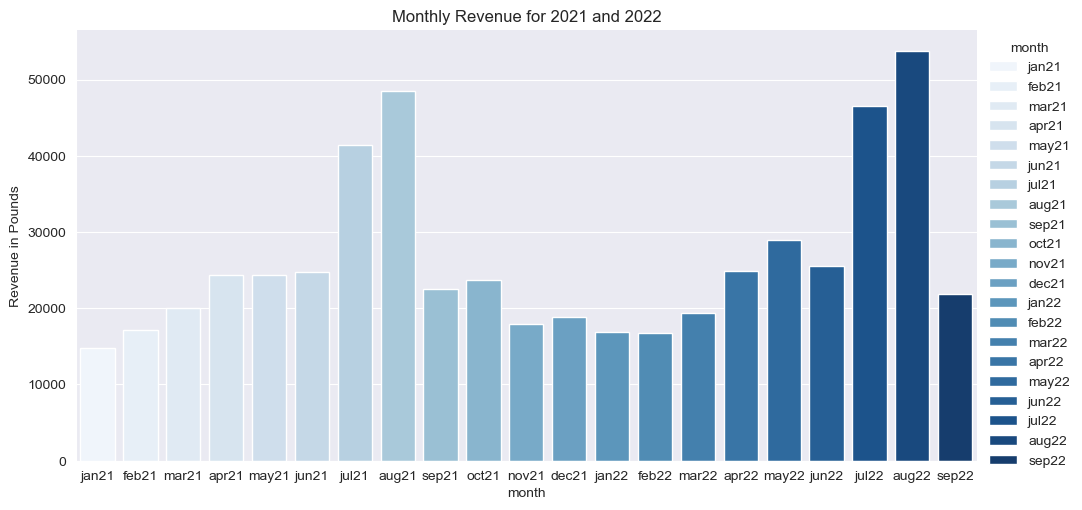

In [2571]:
# Starting point for 11/6 working on changing the color between 2021 and 2022 and adding a scatter plot possibly

df_2021 = merged_rev_2021_2022[:12]
df_2022 = merged_rev_2021_2022[12:]

plt.figure(figsize=(12,4))
sns.catplot(data=merged_rev_2021_2022, x='month', y='revenue', hue='month', palette='Blues', legend=True, kind='bar', aspect=2)

plt.title('Monthly Revenue for 2021 and 2022')
plt.ylabel('Revenue in Pounds')
plt.show()

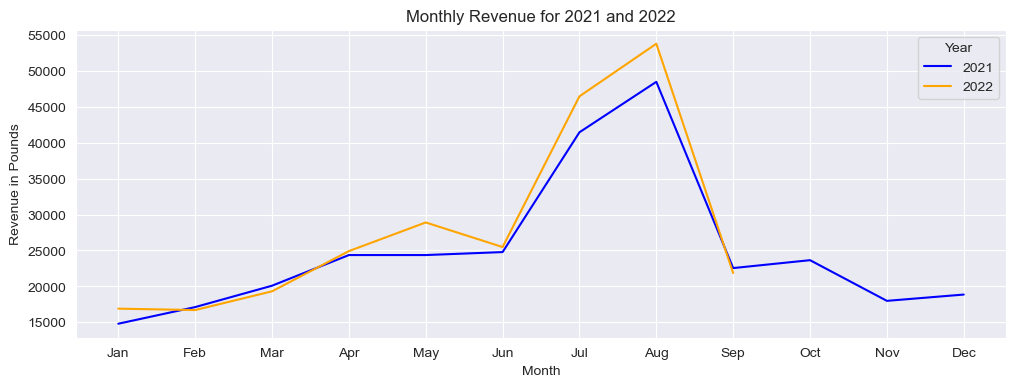

In [2572]:
df_rev_2021 = {
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'revenue': [14798.0, 17116.0, 20093.0, 24365.0, 24365.0, 24780.0, 41470.0, 48499.0, 22551.0, 23651.0, 17984.0, 18861.0]
}

df_rev_2022 = {
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'],
    'revenue': [16898.0, 16702.0, 19313.0, 24914.0, 28907.0, 25482.0, 46480.0, 53808.0, 21860.0]
}

df_rev_2021 = pd.DataFrame(df_rev_2021, columns=['month', 'revenue'])
df_rev_2022 = pd.DataFrame(df_rev_2022, columns=['month', 'revenue'])

plt.figure(figsize=(12, 4))

df_rev_2021['year'] = '2021'
df_rev_2022['year'] = '2022'
combined_df = pd.concat([df_rev_2021, df_rev_2022])

sns.lineplot(data=combined_df, x='month', y='revenue', hue='year', palette=['blue', 'orange'])

plt.title('Monthly Revenue for 2021 and 2022')
plt.xlabel('Month')
plt.ylabel('Revenue in Pounds')
plt.legend(title='Year')
plt.grid(True)

plt.show()

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Determine the <code>top 10 best selling items</code> on the menu. 

In [2573]:
df.head(1)

,Unnamed: 0,date,time,ticket_number,items,quantity,price,year,month
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.9,2021,1


In [2574]:
# Determining the top 10 highest selling items
df_top10 = df.groupby('items').agg({'quantity': 'sum', 'price':'sum', 'price':'first'})

df_top10 = df_top10.sort_values(by='quantity', ascending=False)

df_top10 = df_top10.head(10)

In [2575]:
df_top10

,quantity,price
items,,
TRADITIONAL BAGUETTE,117463.0,1.20
CROISSANT,29654.0,1.10
PAIN AU CHOCOLAT,25236.0,1.20
COUPE,23505.0,0.15
BANETTE,22732.0,1.05
BAGUETTE,22053.0,0.90
CEREAL BAGUETTE,7427.0,1.25
SPECIAL BREAD,5456.0,2.40
FORMULE SANDWICH,5181.0,6.50


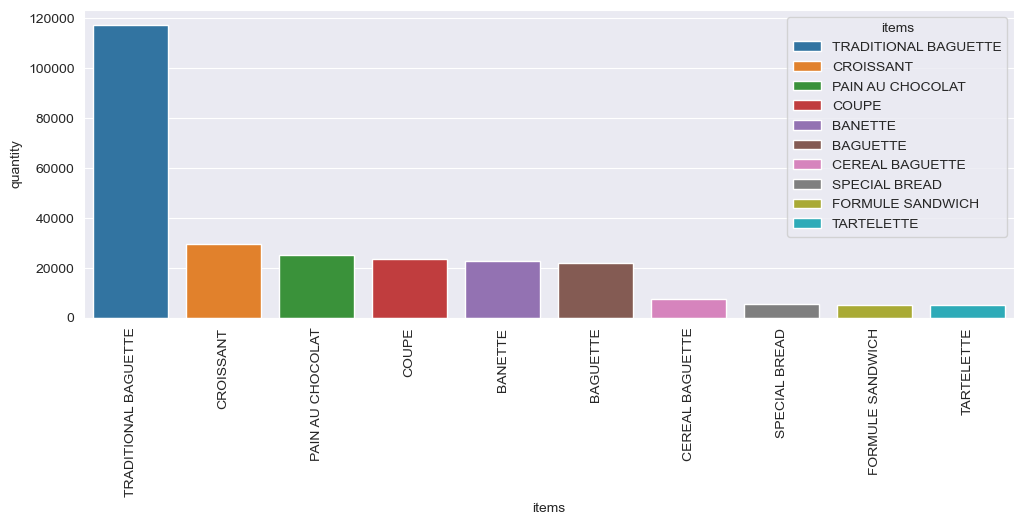

In [2576]:
plt.figure(figsize=(12,4))
sns.barplot(data = df_top10, x='items', y='quantity', hue = 'items', legend= True)
plt.xticks(rotation = 90)
plt.show()

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Determine the 10 items that generate the most <code>revenue</code> on the menu. 

In [2577]:
df_rev10 = df.groupby('items').agg({'quantity':'sum','price':'sum','price':'first'})

df_rev10['rev_per_item']= df_rev10['quantity'] * df_rev10['price']

df_rev10 = df_rev10.sort_values(by='rev_per_item', ascending = False)

df_rev10 = df_rev10.head(10)
df_rev10

,quantity,price,rev_per_item
items,,,
TRADITIONAL BAGUETTE,117463.0,1.20,140955.6
FORMULE SANDWICH,5181.0,6.50,33676.5
CROISSANT,29654.0,1.10,32619.4
PAIN AU CHOCOLAT,25236.0,1.20,30283.2
BANETTE,22732.0,1.05,23868.6
BAGUETTE,22053.0,0.90,19847.7
SPECIAL BREAD,5456.0,2.40,13094.4
SANDWICH COMPLET,2888.0,4.50,12996.0
GRAND FAR BRETON,1486.0,7.00,10402.0


In [2578]:
# Determining what percentage of sales the top 10 selling items made up

df_rev10_sum = df_rev10['rev_per_item'].sum().round(2)

percent_of_rev = df_rev10_sum / (first_9_months + yearly_rev) * 100

print(f'The top 10 best selling items account for {percent_of_rev:.2f}% of total revenue')

The top 10 best selling items account for 54.01% of total revenue


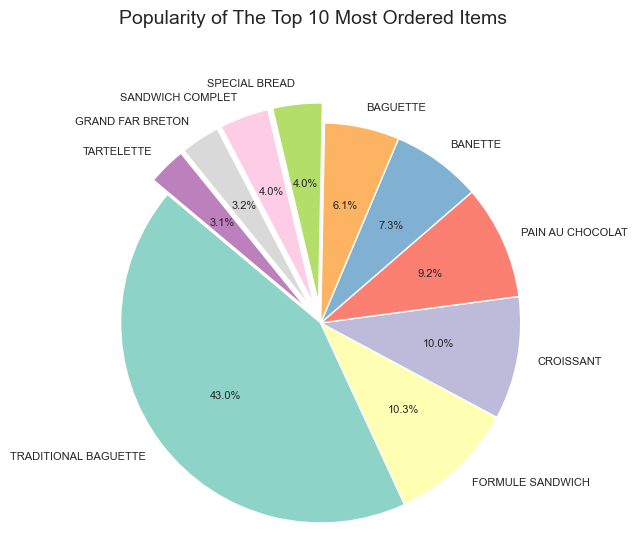

In [2579]:
items = ['TRADITIONAL BAGUETTE', 'FORMULE SANDWICH', 'CROISSANT', 'PAIN AU CHOCOLAT', 'BANETTE', 'BAGUETTE', 'SPECIAL BREAD', 'SANDWICH COMPLET', 'GRAND FAR BRETON', 'TARTELETTE']
rev = [140955.6, 33676.5, 32619.4, 30283.2, 23868.6, 19847.7, 13094.4, 12996.0, 10402.0, 10040.0]

explode = [0,0,0,0,0,0,0.1, 0.1, 0.1, 0.1]

plt.figure(figsize=(6,6))
plt.pie(rev, labels=items, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'), explode=explode, textprops={'fontsize': 8})
plt.axis('equal')

plt.suptitle('Popularity of The Top 10 Most Ordered Items', fontsize=14, y=1)

plt.show()

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Identifying yearly revenue growth, projecting yearly revenue for <code>2022</code> and projecting sales for <code>2023</code

In [2580]:
# Calculating the yearly revenue growth across the first 9 months of the year
yearly_growth = ((first_9_months - total_revenue_2021_first9) / total_revenue_2021_first9) * 100
print(f'Revenue growth year over year: {yearly_growth:.2f}%')

Revenue growth year over year: 24.90%


In [2581]:
rev_projection_2022 = first_9_months * (yearly_growth/100)
rev_projection_2022 = rev_projection_2022 + first_9_months
print(f'The yearly revenue projection for 2022 is: €{rev_projection_2022:.2f}')

The yearly revenue projection for 2022 is: €379001.18


In [2582]:
# Using growth rate to project what revenue for 2023 could look like if growth says consistent
rev_projection_2023 = 361094.79 * (yearly_growth/100)
rev_projection_2023 = rev_projection_2023 + 361094.79
print(f'The yearly revenue projection for 2023 is: €{rev_projection_2023:.2f}')

The yearly revenue projection for 2023 is: €451011.40


C:\Users\PM\AppData\Local\Temp\ipykernel_26192\2997503134.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=revenues, palette="Blues", legend=False)


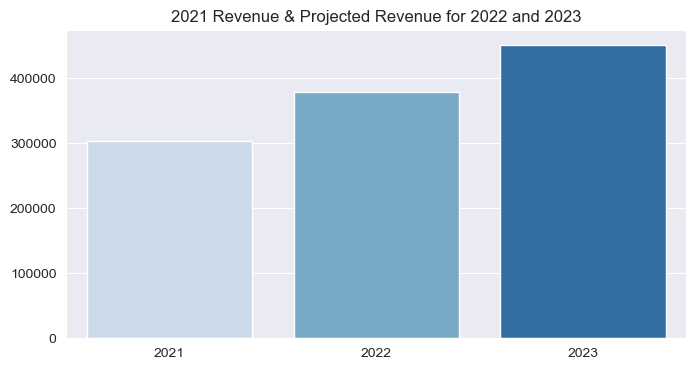

In [2583]:
years = [2021, 2022, 2023]
revenues = [303441.0, 379001.18, 451011.40]

plt.figure(figsize=(8, 4))
sns.barplot(x=years, y=revenues, palette="Blues", legend=False)

plt.title('2021 Revenue & Projected Revenue for 2022 and 2023')

plt.show()

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Combining monthly dataframes to so one CSV can be exported for Excel and Tableau visualization. 

In [2584]:
top_10_items.to_csv(r'C:\Users\PM\Desktop\Data Analytics Projects\Bakery Sales\French_Bakery_Data.csv', index=False)

In [2585]:
# Creating a new dataframe with the data I will need to create a dashboard in Excel & Tableau
monthly_data = df.groupby(['year', 'month', 'items']).agg({'quantity': 'sum', 'price': 'first'}).reset_index()
monthly_data['rev_per_item'] = monthly_data['quantity'] * monthly_data['price']

monthly_data = monthly_data.sort_values(by=['year', 'month', 'rev_per_item'], ascending=[True, True, False])

monthly_data.reset_index(drop=True, inplace=True)

top_10_items = pd.DataFrame(columns=['year', 'month', 'items', 'quantity', 'price', 'rev_per_item'])

for year in monthly_data['year'].unique():
    for month in monthly_data['month'].unique():
        monthly_subset = monthly_data[(monthly_data['year'] == year) & (monthly_data['month'] == month)]
        top_10_subset = monthly_subset.head(10)
        top_10_items = pd.concat([top_10_items, top_10_subset])

top_10_items.reset_index(drop=True, inplace=True)

top_10_items.head()

,year,month,items,quantity,price,rev_per_item
0,2021,1,TRADITIONAL BAGUETTE,2751.0,1.2,3301.2
1,2021,1,CROISSANT,786.0,1.1,864.6
2,2021,1,FORMULE SANDWICH,132.0,6.5,858.0
3,2021,1,PAIN AU CHOCOLAT,613.0,1.2,735.6
4,2021,1,GAL FRANGIPANE 4P,86.0,8.0,688.0


<head>
  <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Montserrat">
</head>
<div style="font-family: 'Montserrat', sans-serif; font-size: 18px; width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border-radius: 10px; font-weight: bold; text-align: center;">
<h4>Exel Visualization</h4>
</div>

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #000000; border-radius:10px;">

Now that we have completed the section of this project using python, we want to download the CSV and upload in into Excel for our data visulization. If you would like access to the data set, pivot table, and dashboard download the xlsx file on github.

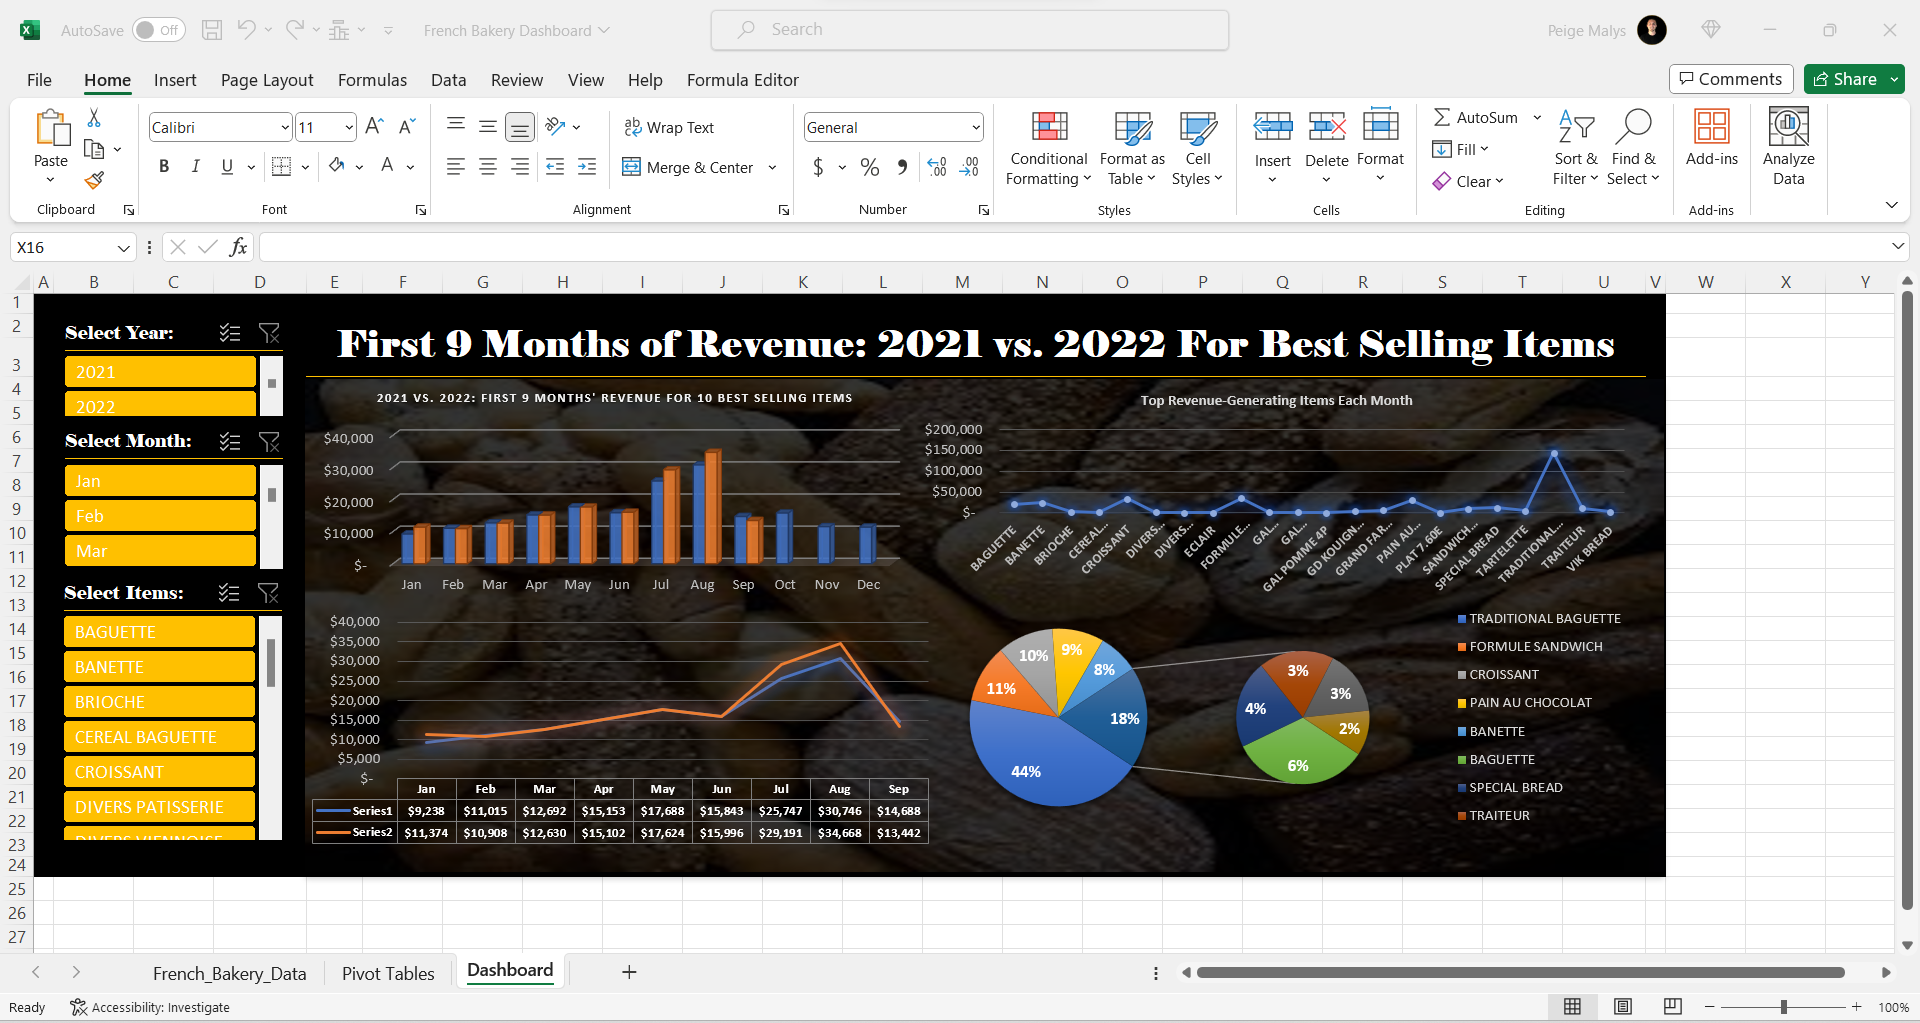

<head>
  <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Montserrat">
</head>
<div style="font-family: 'Montserrat', sans-serif; font-size: 18px; width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border-radius: 10px; font-weight: bold; text-align: center;">
<h4>Tableau Visualization</h4>
</div>

<head>
  <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Montserrat">
</head>
<div style="font-family: 'Montserrat', sans-serif; font-size: 18px; width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border-radius: 10px; font-weight: bold; text-align: center;">
<h4>Conclusion</h4>
</div>

**Identify the highest-grossing months of the year:**
The highest grossing months each year were in August, specifically revenue for August 2021 was €48499.0 and revenue for August 2022 was €53808.0.

**Determine the top 10 best-selling items on the menu:**
The top 10 best selling ontems on the menu are as follows: TRADITIONAL BAGUETTE, FORMULE SANDWICH, CROISSANT, PAIN AU CHOCOLAT, BANETTE, BAGUETTE, SPECIAL BREAD, SANDWICH COMPLET, GRAND FAR BRETON, TARTELETTE.

**Determine year-over-year revenue growth:**
Between 2021 and 2022 projected revenue growth was approximately 24.90%.

**Project total yearly revenue for 2022:**
The yearly revenue projection for 2022 is: €379001.18.

**Project yearly revenue for 2023:**
As long as the current growth rate of 24.90% holds consistent year over year, the yearly revenue projection for 2023 is: €451011.40.